## Forest Fires - Classify the Size Categories using SVM 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Reading dataset
df = pd.read_csv('forest_fires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.shape

(517, 31)

In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#No missing values.
#No incorrect data types.

## EDA

In [7]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [8]:
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


,size_category,counts
0,small,378
1,large,139


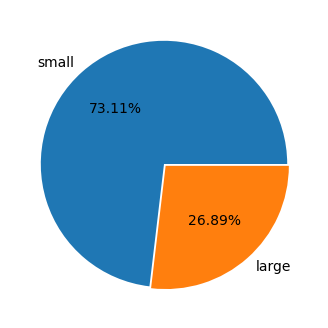

In [9]:
plt.figure(figsize=(4,4))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [10]:
#Other features with target variable

month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


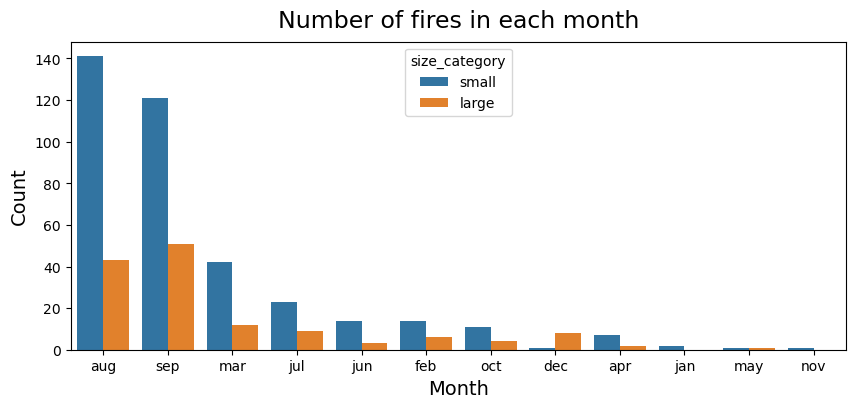

In [11]:
plt.figure(figsize=(10,4))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Number of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Observations

*Aug month has seen highest number of small fires.


*Whereas sep month has seen highest num of large fires.


*Least num of fires occured in month of nov.

In [ ]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Observation:
    
Highest num of small as well as large fires have occured on a Sunday.

Lowest num of small fires have occured on a Wednesday.

Lowest num of large fires have occured on a Wednesday and Thursday


## Label Encoder

In [12]:
labelencoder = LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']  #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

## Dependency of Target variable on diff Features

In [14]:
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [15]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


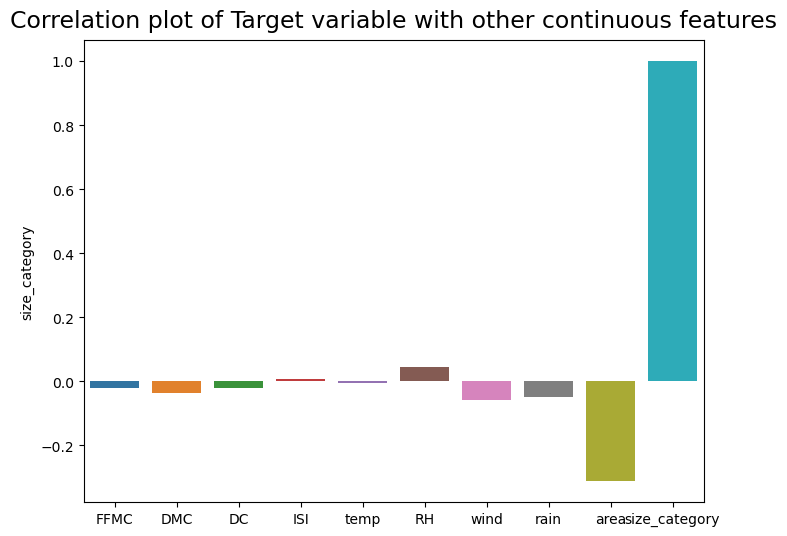

In [19]:
fig , ax = plt.subplots(figsize=(8,6))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)
plt.show()

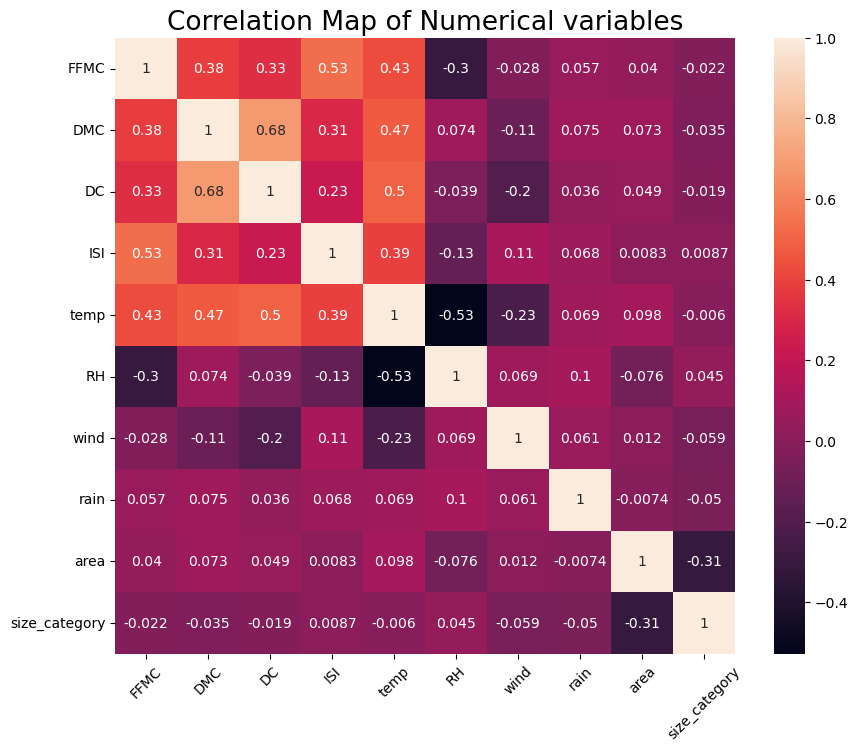

In [29]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19);

Observation:

Highest corr of size_category has with area of forest.

Then ranks wind.

## Data Preprocessing

In [20]:
#Drop the unnecessary columns

df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [21]:
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [32]:
#Check the outliers

from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [33]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
196,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,10.93,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,-1
202,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,-1
284,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,-1
395,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,-1
465,79.5,3.6,15.3,1.8,4.6,59,0.9,0.0,6.84,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,-1
499,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,-1


In [34]:
outliers.index

Int64Index([196, 202, 284, 395, 465, 499], dtype='int64')

In [35]:
df.drop([196, 202, 284, 395, 465, 499], axis=0, inplace=True)

In [36]:
df.shape

(505, 27)

## Splitting data into target variable and independent variables

In [37]:
x = df.drop('size_category', axis=1)
y = df['size_category']

## Converting independent features into normalised and standardized data

In [38]:
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)   # data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)     # data between -1 to +1

In [40]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.187361,-1.375710,-1.925209,-0.898124,-1.956110,0.450595,1.540394,-0.101433,-0.198131,2.238728,-0.440288,-0.468836,-0.367194,-0.367194,-0.346026,-0.118559,-0.753872,-0.126872,-0.168859,-0.260102,-0.180886,2.889957,-0.063057,-0.044544,-0.174964,-0.718691
1,-0.098228,-1.229627,0.462946,-0.542205,-0.201168,-0.682124,-1.769329,-0.101433,-0.198131,-0.446682,-0.440288,-0.468836,-0.367194,2.723356,-0.346026,-0.118559,-0.753872,-0.126872,-0.168859,-0.260102,-0.180886,-0.346026,-0.063057,-0.044544,5.715476,-0.718691
2,-0.098228,-1.097834,0.536901,-0.542205,-0.810025,-0.682124,-1.541072,-0.101433,-0.198131,-0.446682,2.271241,-0.468836,-0.367194,-0.367194,-0.346026,-0.118559,-0.753872,-0.126872,-0.168859,-0.260102,-0.180886,-0.346026,-0.063057,-0.044544,5.715476,-0.718691
3,0.174056,-1.262972,-1.995009,-0.030570,-1.938202,3.345322,-0.000339,2.032886,-0.198131,2.238728,-0.440288,-0.468836,-0.367194,-0.367194,-0.346026,-0.118559,-0.753872,-0.126872,-0.168859,-0.260102,-0.180886,2.889957,-0.063057,-0.044544,-0.174964,-0.718691
4,-0.420017,-0.977156,-1.892386,0.102900,-1.383068,3.471180,-1.255751,-0.101433,-0.198131,-0.446682,-0.440288,2.132944,-0.367194,-0.367194,-0.346026,-0.118559,-0.753872,-0.126872,-0.168859,-0.260102,-0.180886,2.889957,-0.063057,-0.044544,-0.174964,-0.718691


# Model Building

### Creating train and test data for model validation

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((378, 26), (127, 26), (378,), (127,))

## Model Training | Testing | Evaluation

### Kernel = rbf

In [46]:
clf = SVC()
param_grids = [{'kernel':['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['rbf']}])

In [47]:
grid.best_score_, grid.best_params_

(0.8388888888888889, {'C': 13, 'kernel': 'rbf'})

### rbf kernel with gamma as scale

In [48]:
clf=SVC(kernel='rbf', C=13, gamma = 'scale')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 81.10236220472441
Train Accuracy = 94.17989417989418


array([[20, 21],
       [ 3, 83]], dtype=int64)

### rbf kernel with gamma as auto

In [50]:
clf=SVC(kernel='rbf', C=13, gamma = 'auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 81.10236220472441
Train Accuracy = 94.17989417989418


array([[20, 21],
       [ 3, 83]], dtype=int64)

### Kernel = Polynomial

In [51]:
clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [52]:
grid.best_score_, grid.best_params_

(0.8755847953216375, {'C': 15, 'degree': 1, 'kernel': 'poly'})

In [53]:
clf_p=SVC(kernel='poly', C=15, degree =1 )
clf_p.fit(x_train, y_train)
y_pred_p = clf_p.predict(x_test)
y_pred1 = clf_p.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred_p)

Test Accuracy  = 81.10236220472441
Train Accuracy = 88.62433862433863


array([[23, 18],
       [ 1, 85]], dtype=int64)

### Kernel = Linear

In [55]:
clf = SVC()
param_grids = [{'kernel':['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['linear']}])

In [56]:
grid.best_score_, grid.best_params_

(0.9736130867709816, {'C': 15, 'kernel': 'linear'})

In [57]:
clf_l=SVC(kernel='linear', C=15)
clf_l.fit(x_train, y_train)
y_pred_l = clf_l.predict(x_test)
acc = accuracy_score(y_pred_l, y_test)*100
y_pred1 = clf_l.predict(x_train)
acc1= accuracy_score(y_pred1, y_train)*100
print("Test Accuracy  =" , acc)
print("Train Accuracy =", acc1)
confusion_matrix(y_test, y_pred_l)

Test Accuracy  = 96.8503937007874
Train Accuracy = 98.14814814814815


array([[37,  4],
       [ 0, 86]], dtype=int64)

# Conclusion
It is clearly evident that our linear kernel model of SVC is giving us the highest accuracy.

Hence we will be using it as our model.